In [1]:
%matplotlib inline
from findatapy.market import Market, MarketDataRequest, MarketDataGenerator

In [2]:
from findatapy.util.dataconstants import DataConstants

# Yahoo data 

In [4]:
market = Market(market_data_generator=MarketDataGenerator())

In [5]:
md_request = MarketDataRequest(
        start_date="decade",            # start date
        data_source='yahoo',     # use Bloomberg as data source
        tickers=['Apple'], # ticker (findatapy)
        fields=['close'],               # which fields to download
        vendor_tickers=['aapl'],   # ticker (Alpha Vantage)
        vendor_fields=['Close'])        # which Bloomberg fields to download)

In [6]:
df = market.fetch_market(md_request)

2019-11-02 12:24:46,873 - findatapy.market.datavendorweb - INFO - Request Yahoo data
2019-11-02 12:24:47,134 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
2019-11-02 12:24:47,347 - findatapy.market.datavendorweb - INFO - Completed request from Yahoo.


/Users/dkn22/Documents/Git/findatapy/findatapy/market/ioengine.py:264: FutureWarning: to_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  r.set(fname, data_frame.to_msgpack(compress='blosc'))


In [7]:
df

,Apple.close
Date,
2009-11-05,27.718571
2009-11-06,27.762857
2009-11-09,28.780001
2009-11-10,28.997143
2009-11-11,29.035715
...,...
2019-10-28,249.050003
2019-10-29,243.289993
2019-10-30,243.259995


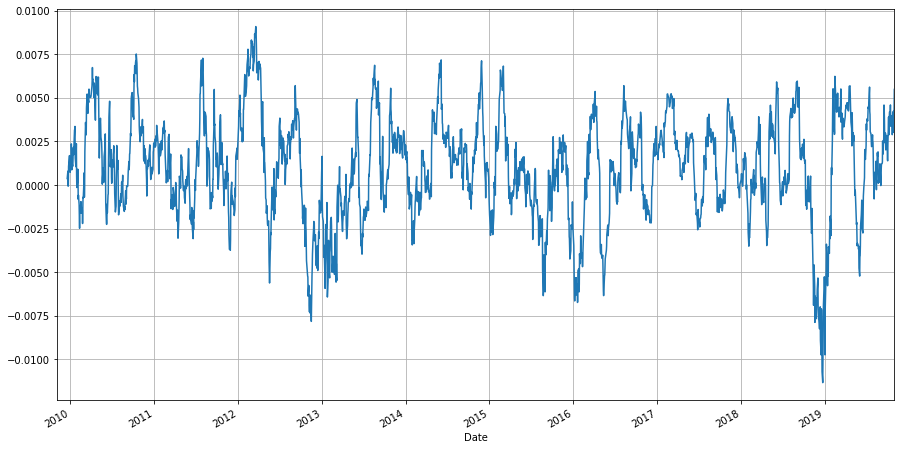

In [8]:
df['Apple.close'].pct_change().rolling(30).mean().plot(grid=True, figsize=(15,8))

# Quandl

In [3]:
market = Market(market_data_generator=MarketDataGenerator())

In [4]:
md_request = MarketDataRequest(
        start_date="decade",            # start date
        data_source='quandl',     # use Bloomberg as data source
        tickers=['APPL'], # ticker (findatapy)
        fields=['close'],               # which fields to download
        vendor_tickers=['APPL'],   # ticker (Alpha Vantage)
        vendor_fields=['Close'])        # which Bloomberg fields to download)

In [5]:
df = market.fetch_market(md_request)

2019-11-02 14:12:24,753 - findatapy.market.datavendorweb - INFO - Request Quandl data
2019-11-02 14:12:24,754 - findatapy.market.datavendorweb - ERROR - The tickers ['APPL'] do not exist on Quandl.
'NoneType' object has no attribute 'index'
2019-11-02 14:12:24,778 - findatapy.market.marketdatagenerator - WARNING - No data returned for ['APPL']


In [13]:
df.tail()

,NAURU_CURRENT_ACCOUNT_BALANCE.close
Date,
2014-12-31,-13.479
2015-12-31,-9.486
2016-12-31,1.711
2017-12-31,4.120
2018-12-31,-7.692


# boe

In [20]:
import datetime
boe_url = "http://www.bankofengland.co.uk/boeapps/iadb/fromshowcolumns.asp?csv.x=yes&Datefrom={start_date}&Dateto={end_date}&SeriesCodes={tickers}&CSVF=TN&UsingCodes=Y&VPD=Y&VFD=N"
start_time = datetime.date(2010, 1, 7).strftime("%d/%b/%Y")
end_time = datetime.date(2019, 10, 22).strftime("%d/%b/%Y")

In [23]:
import pandas as pd
pd.read_csv(boe_url.format(start_date=start_time, end_date=end_time,tickers='IUMBV34,IUMBV37,IUMBV42,IUMBV45'))

,DATE,IUMBV34,IUMBV37,IUMBV42,IUMBV45
0,31 Jan 2010,3.97,4.64,5.56,..
1,28 Feb 2010,3.88,4.68,5.50,..
2,31 Mar 2010,3.92,4.68,5.50,..
3,30 Apr 2010,3.82,4.65,5.50,..
4,31 May 2010,3.78,4.56,5.38,..
...,...,...,...,...,...
112,31 May 2019,1.65,1.79,1.99,2.57
113,30 Jun 2019,1.64,1.77,1.97,2.59
114,31 Jul 2019,1.63,1.76,1.94,2.6
115,31 Aug 2019,1.61,1.74,1.90,2.62


In [26]:
#%load_ext autoreload
%autoreload 2
from findatapy.market.datavendorweb import DataVendorYahoo, DataVendorBOE

In [27]:
md_request = MarketDataRequest(
        start_date="decade",            # start date
        data_source='boe',     # use Bloomberg as data source
        tickers=['IUMBV34', 'IUMBV37'], # ticker (findatapy)
        fields=['close'],               # which fields to download
        vendor_tickers=['IUMBV34', 'IUMBV37'],   # ticker (Alpha Vantage)
        vendor_fields=['Close'])        # which Bloomberg fields to download)

In [28]:
boe = DataVendorBOE()

In [29]:
boe.load_ticker(md_request)

2019-11-02 14:07:43,529 - findatapy.market.datavendorweb - INFO - Request BOE data
2019-11-02 14:07:44,722 - findatapy.market.datavendorweb - INFO - Completed request from BOE.


,IUMBV34.close,IUMBV37.close
Date,,
30 Nov 2009,4.10,4.88
31 Dec 2009,4.05,4.84
31 Jan 2010,3.97,4.64
28 Feb 2010,3.88,4.68
31 Mar 2010,3.92,4.68
...,...,...
31 May 2019,1.65,1.79
30 Jun 2019,1.64,1.77
31 Jul 2019,1.63,1.76


In [21]:
md_request.vendor_fields * 5

['Close', 'Close', 'Close', 'Close', 'Close']

# ONS 

In [6]:
import requests, json

In [10]:
payload = {
    "dataset": {
        "id": "cpih01",
        "edition": "time-series",
        "version": "6"
    },
    "dimensions": [
        {
            "name": "geography",
            "options": [
                "K02000001"
            ]
        }
    ]
}

In [9]:
base_url = "https://api.beta.ons.gov.uk/v1"

In [11]:
requests.get(base_url, params=payload)

<Response [404]>